In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import scipy.stats
import time

In [2]:
n = 1000

In [3]:
random.seed(1)

In [4]:
start = 0
jumpsum = 0
total_jumps = 0
n_trys = 10000

x = []
y = []
eval = []
evalr = []
evalr2 = []
evalr3 = []
sigma = []
time1 = 0
time2 = 0
time3 = 0
time4 = 0

In [5]:
for npad in range(1,n+1):
    
    
    start1 = time.time()
    if (npad == 1):
        eval.append(1)
        evalr.append(1)
    else:
        sum = 0.0
        for i in range(1,npad):
            #print(i,npad,eval[npad-i-1])
            sum = sum + 1.0/npad*(1.0+eval[npad-i-1])
        sum = sum + 1.0/npad
        eval.append(sum)
        #evalr.append(eval[npad-1]/npad)
        evalr.append(eval[npad-1])
    #print("Theory: ",npad,eval[npad-1])
    time1 = time1 + (time.time()-start1)
    
    start2 = time.time()
    sum = 0.0
    for i in range(1,npad+1):
        sum = sum + 1.0/i
    evalr2.append(sum)
    time2 = time2 + (time.time()-start2)
    
    x.append(npad)
    
    start3 = time.time()
    sum2 = 1.0/scipy.stats.hmean(x)*npad
    evalr3.append(sum2)
    time3 = time3 + (time.time()-start3)
    
    #print (npad,sum2)
    
    start4 = time.time()
    end = npad
    for j in range(n_trys):
        while start < npad:
            jump = int(random.uniform(1,(end-start+1)))
            #print ("Jump = ",jump)
            start = start + jump
            #print ("Now at ",start)
            jumpsum = jumpsum + 1
        start = 0
        #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
        total_jumps = total_jumps + jumpsum
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    expectation_value = total_jumps/n_trys*1.0
    y.append(expectation_value)
    sigma.append(expectation_value*1/math.sqrt(n_trys))
    total_jumps = 0
    #print ("Expectation value for n = %d is %f" % (npad,expectation_value))
    time4 = time4 + (time.time()-start4)
    
print (time1,time2,time3,time4)

0.09632635116577148 0.04501008987426758 0.03853440284729004 41.23601293563843


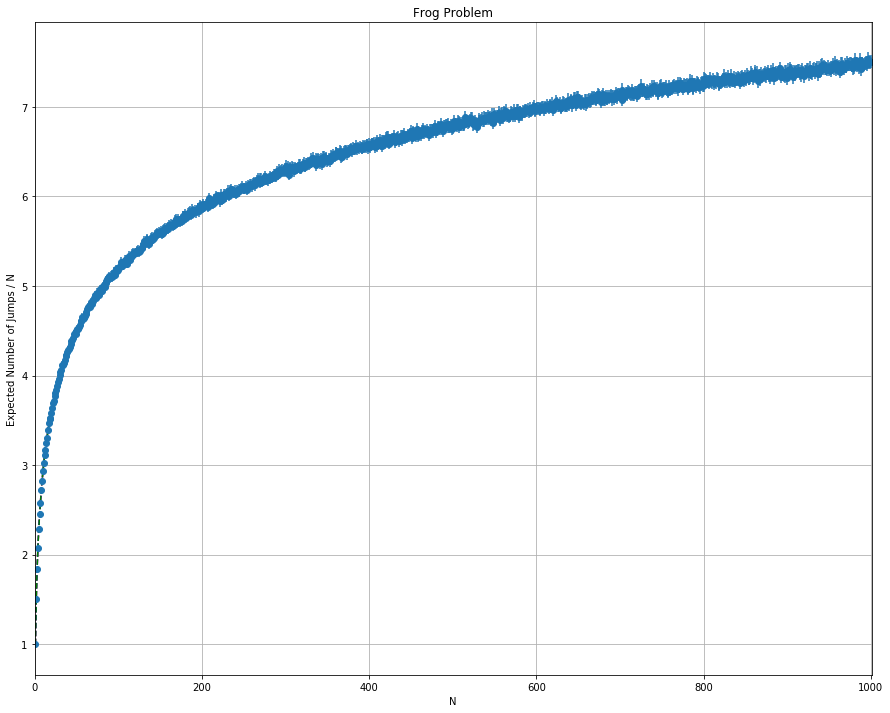

In [8]:
def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x+paramlist[2]*x*x+paramlist[3]*x*x*x


fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(0,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
ax1.plot(x,evalr,'r--')
ax1.plot(x,evalr2,'b--')
ax1.plot(x,evalr3,'g--')
